In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Visualización y análisis

In [81]:
serie_datos = pd.read_csv('../data/series.csv')
serie_datos.DATE = pd.to_datetime(serie_datos.DATE)
serie_datos = serie_datos[serie_datos.DATE>pd.to_datetime('2019-06-01')]
serie_datos.sort_values(by='DATE',inplace=True)

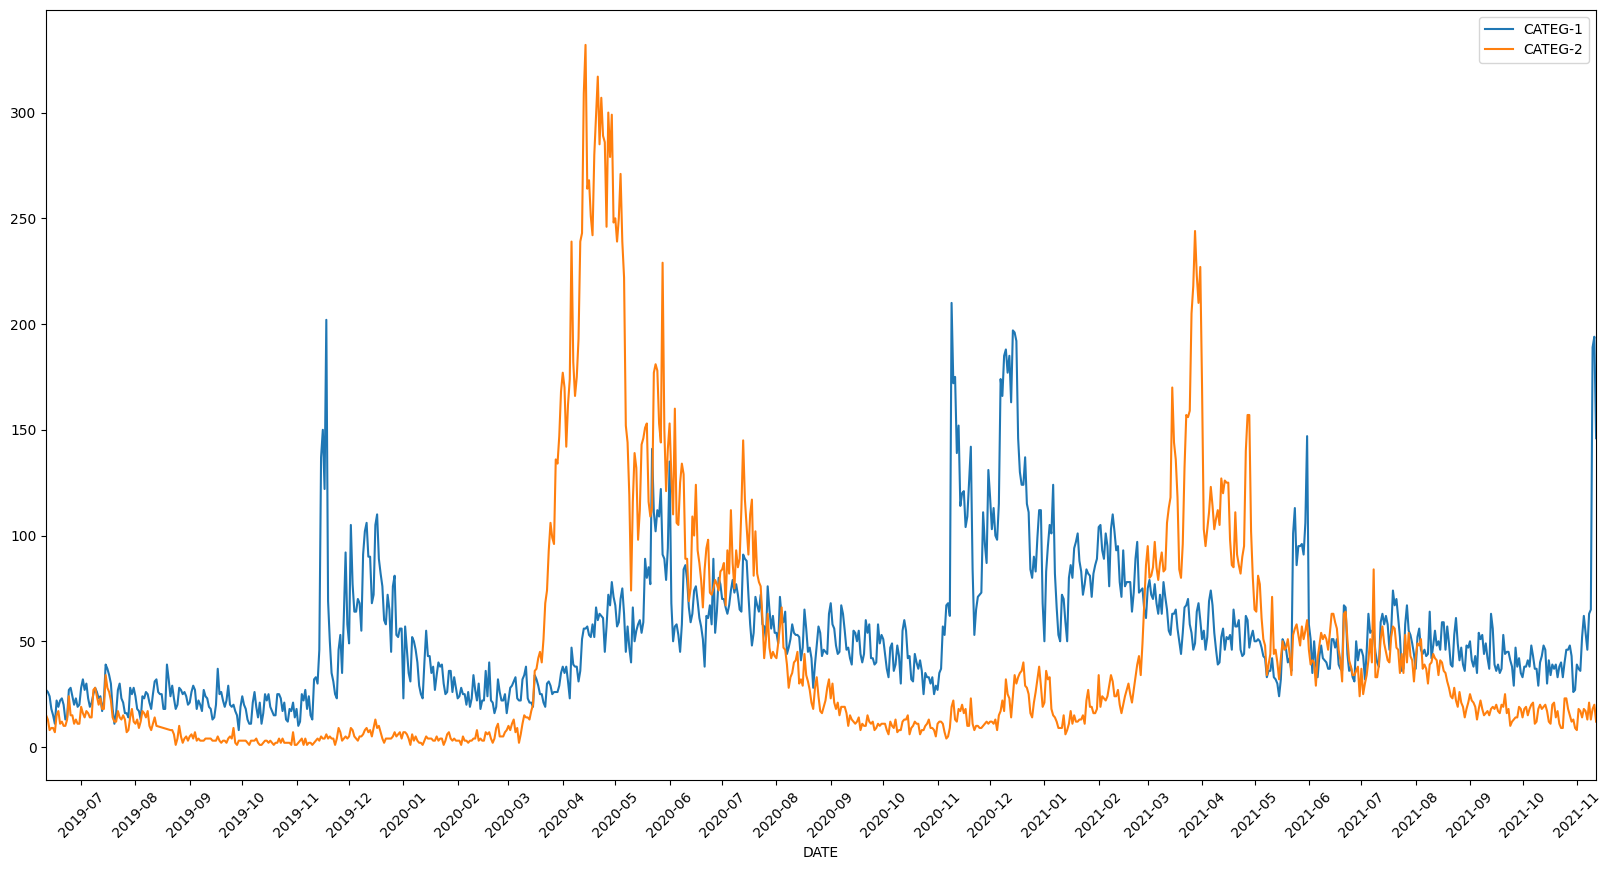

In [102]:
fig, axs = plt.subplots(1,1,figsize=(20,10))
serie_datos[serie_datos.CATEGORY=='CATEG-1'].plot(x='DATE',y='UNITS_SOLD',kind='line',ax=axs,label='CATEG-1')
serie_datos[serie_datos.CATEGORY=='CATEG-2'].plot(x='DATE',y='UNITS_SOLD',kind='line',ax=axs,label='CATEG-2')
#serie_datos[serie_datos.CATEGORY=='CATEG-3'].plot(x='DATE',y='UNITS_SOLD',kind='line',ax=axs,label='CATEG-3')
axs.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [87]:
serie_datos[serie_datos.CATEGORY=='CATEG-1']

,CATEGORY,DATE,UNITS_SOLD
506,CATEG-1,2019-06-11,27
1539,CATEG-1,2019-06-12,26
423,CATEG-1,2019-06-13,24
2222,CATEG-1,2019-06-14,18
2485,CATEG-1,2019-06-15,15
...,...,...,...
1723,CATEG-1,2021-11-08,63
717,CATEG-1,2021-11-09,65
2605,CATEG-1,2021-11-10,189
736,CATEG-1,2021-11-11,194


# 2. Descomposición

In [43]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(serie_datos, test_size=0.2, shuffle=False)
train, val = train_test_split(train_val, test_size=0.25, shuffle=False)

print(f"Training set shape: {train.shape} ({train.shape[0]/serie_datos.shape[0]:.2%})")
print(f"Validation set shape: {val.shape} ({val.shape[0]/serie_datos.shape[0]:.2%})")
print(f"Test set shape: {test.shape} ({test.shape[0]/serie_datos.shape[0]:.2%})")


Training set shape: (1611, 3) (59.98%)
Validation set shape: (537, 3) (19.99%)
Test set shape: (538, 3) (20.03%)


## Descomposición multiplicativa

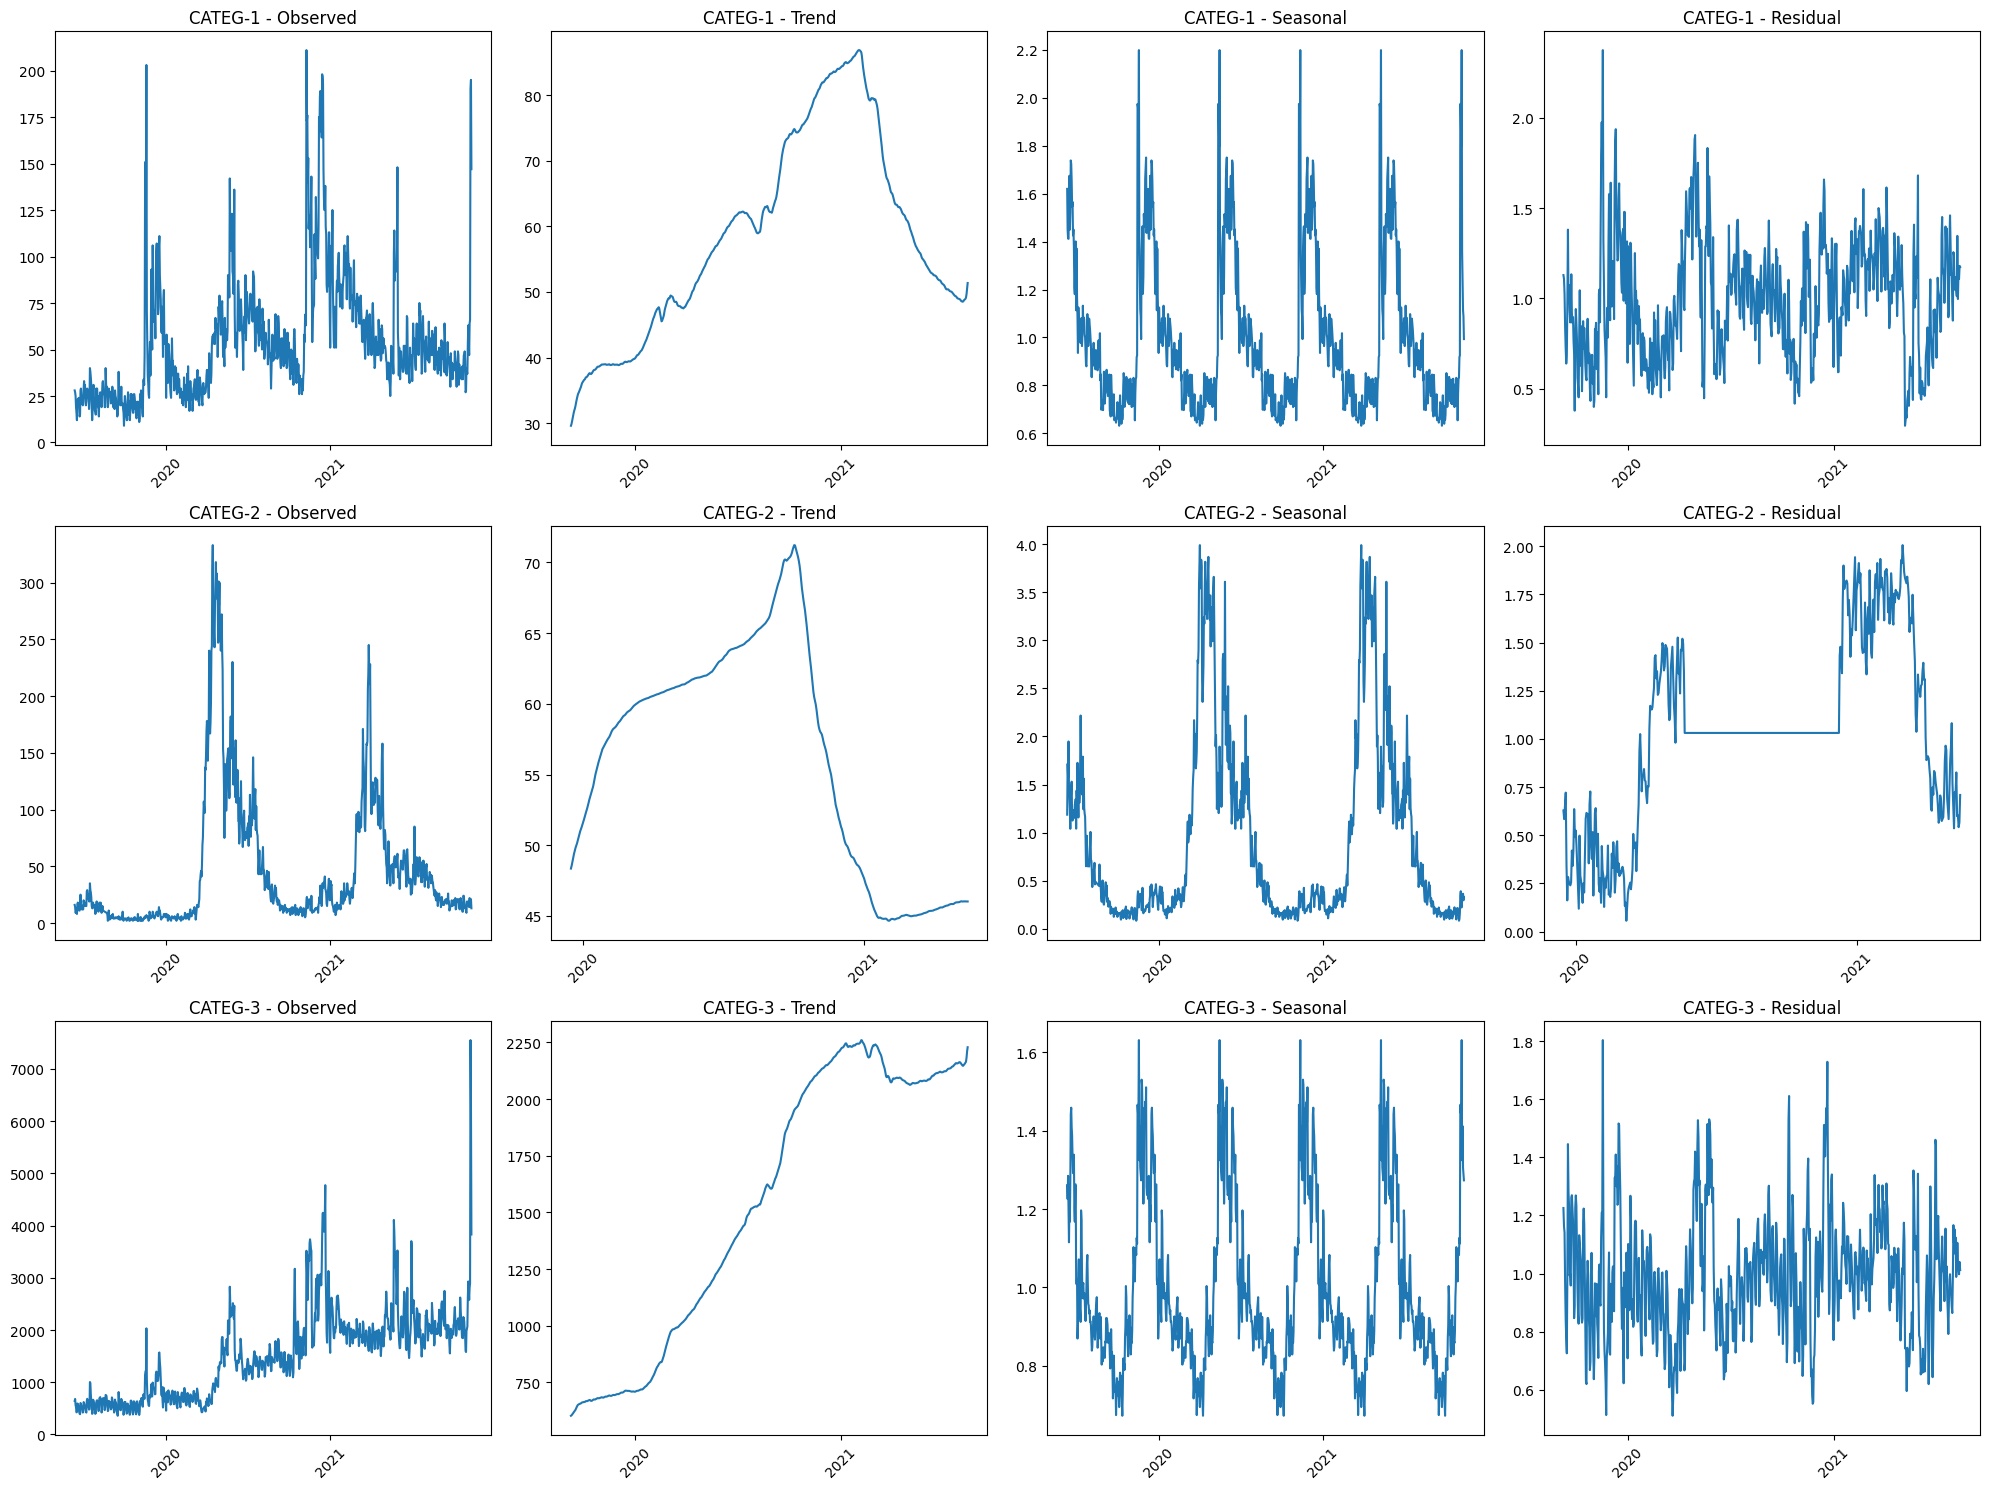

In [105]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
categories = ['CATEG-1', 'CATEG-2', 'CATEG-3']
decomposition_titles = ['Observed', 'Trend', 'Seasonal', 'Residual']
periods = [180,360,180]

for i, category in enumerate(categories):
    data = serie_datos[serie_datos.CATEGORY == category].UNITS_SOLD + 1
    multiplicative_decomposition = seasonal_decompose(data, model='multiplicative', period=periods[i])
    
    components = [data, multiplicative_decomposition.trend, 
                  multiplicative_decomposition.seasonal, 
                  multiplicative_decomposition.resid]
    
    for j, (component, title) in enumerate(zip(components, decomposition_titles)):
        ax = axs[i, j]
        ax.plot(serie_datos[serie_datos.CATEGORY == category].DATE, component)
        ax.set_title(f'{category} - {title}')
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.tick_params(axis='x', rotation=45)
        
plt.tight_layout()
plt.show()


## Descomposición aditiva

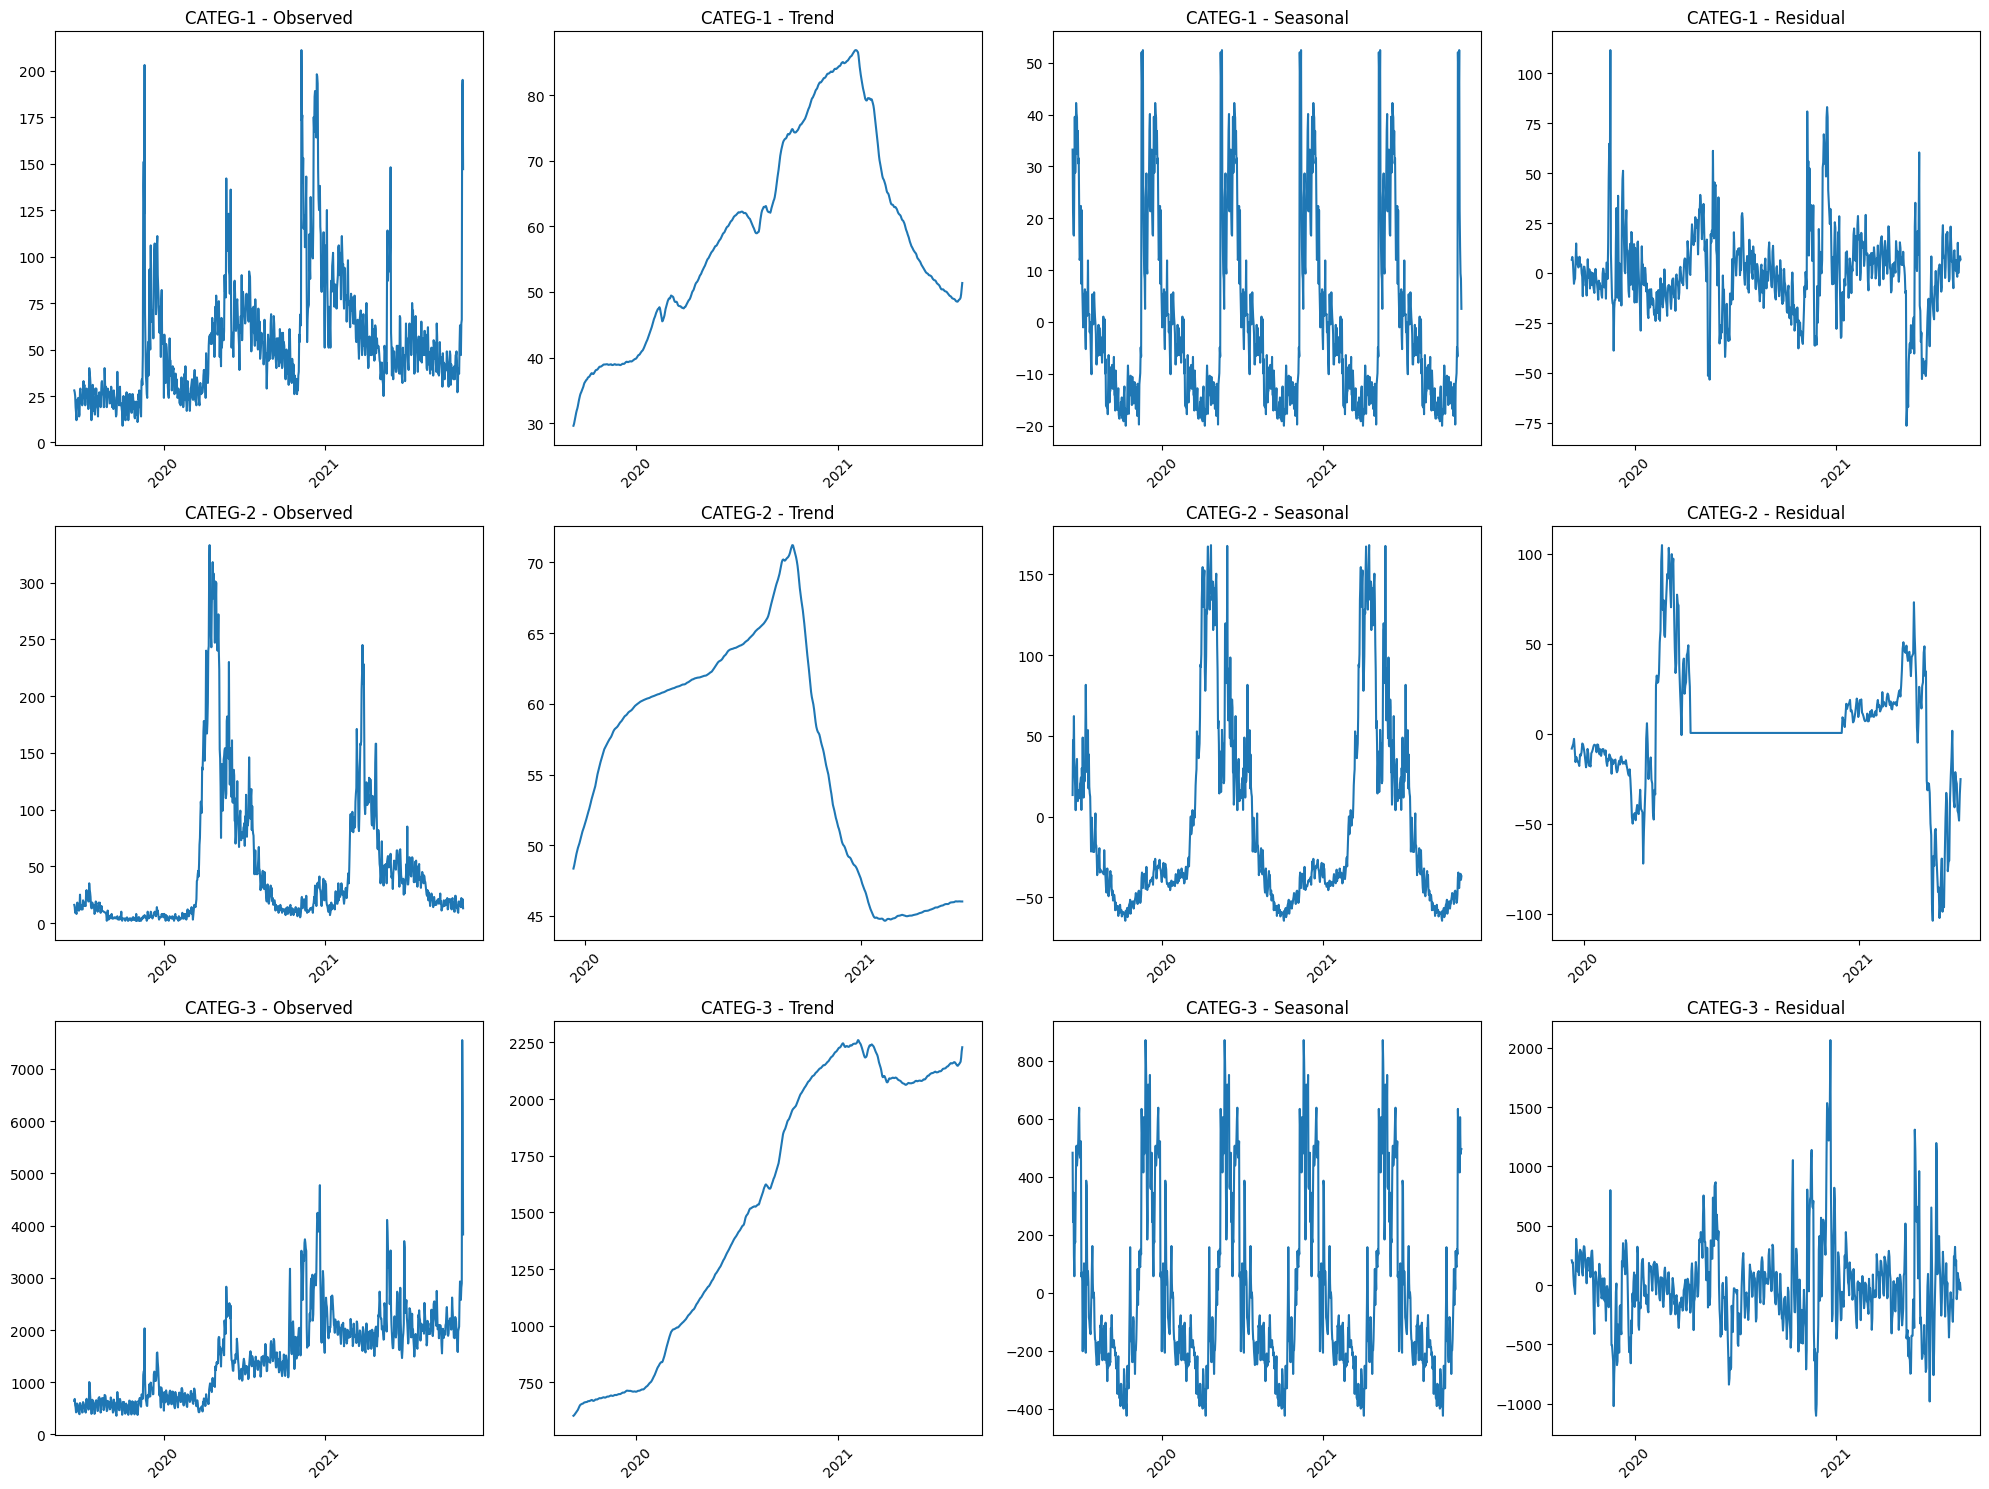

In [106]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
categories = ['CATEG-1', 'CATEG-2', 'CATEG-3']
decomposition_titles = ['Observed', 'Trend', 'Seasonal', 'Residual']
periods = [180,360,180]

for i, category in enumerate(categories):
    data = serie_datos[serie_datos.CATEGORY == category].UNITS_SOLD + 1
    additive_decomposition = seasonal_decompose(data, model='additive', period=periods[i])
    
    components = [data, additive_decomposition.trend, 
                  additive_decomposition.seasonal, 
                  additive_decomposition.resid]
    
    for j, (component, title) in enumerate(zip(components, decomposition_titles)):
        ax = axs[i, j]
        ax.plot(serie_datos[serie_datos.CATEGORY == category].DATE, component)
        ax.set_title(f'{category} - {title}')
        ax.xaxis.set_major_locator(mdates.YearLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.tick_params(axis='x', rotation=45)
        
plt.tight_layout()
plt.show()
